# Demo: Normal Distribution of Stock Ticker Data

This program retrieves stock price data using the Alpaca API and plots the data using Pandas. These plots demonstrate the distribution of daily stock closing prices compared to the expected normal probability distribution. 

## Import Dependencies

In [7]:
# Import libraries and dependencies
import os
import pandas as pd
import alpaca_trade_api as tradeapi

# Load .env environment variables
from dotenv import load_dotenv
load_dotenv()

%matplotlib inline

Python-dotenv could not parse statement starting at line 1


In [8]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

## Get 1 Year's Worth of Stock Price Data via Alpaca API Call and Read in as DataFrame 

In [9]:
# Set the Tesla and Coca-Cola tickers
ticker = ["TSLA","KO"]

# Set timeframe to "1Day"
timeframe = "1Day"

# Set start and end datetimes of 1 year, between now and 365 days ago.
start_date = pd.Timestamp("2019-05-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-05-01", tz="America/New_York").isoformat()

# Get 1 year's worth of historical data for Tesla and Coca-Cola
df_ticker = alpaca.get_bars(ticker, timeframe, start = start_date, end = end_date).df

# Reorganize the DataFrame
# Separate ticker data
TSLA = df_ticker[df_ticker['symbol'] == 'TSLA'].drop('symbol', axis = 1)
KO = df_ticker[df_ticker['symbol'] == 'KO'].drop('symbol', axis = 1)

# Concatenate the ticker DataFrames
df_ticker = pd.concat([TSLA, KO], axis = 1, keys = ['KO', 'TSLA'])

# Display sample data
df_ticker.head(10)

KO                                        \
                             open      high       low   close    volume   
timestamp                                                                 
2019-05-01 04:00:00+00:00  238.85  240.0000  231.5000  234.01  10704355   
2019-05-02 04:00:00+00:00  245.65  247.1300  237.7200  244.10  18167261   
2019-05-03 04:00:00+00:00  244.00  256.6100  243.4900  255.03  23740838   
2019-05-06 04:00:00+00:00  250.00  258.3499  248.5000  255.34  10860343   
2019-05-07 04:00:00+00:00  256.80  257.2100  245.1000  247.06  10261408   
2019-05-08 04:00:00+00:00  246.94  250.5990  244.2000  244.84   6180840   
2019-05-09 04:00:00+00:00  241.75  243.6800  236.9434  241.98   6722392   
2019-05-10 04:00:00+00:00  239.75  241.9900  236.0200  239.52   7019816   
2019-05-13 04:00:00+00:00  232.32  232.4700  224.5000  227.01  10834883   
2019-05-14 04:00:00+00:00  229.30  234.5000  228.0000  232.31   7254012   

                                                    TSLA                  \
                          trade_count        vwap   open     high    low   
timestamp                                                                  
2019-05-01 04:00:00+00:00      108382  234.544288  48.95  49.0750  48.55   
2019-05-02 04:00:00+00:00      173521  242.763484  48.53  48.7657  48.27   
2019-05-03 04:00:00+00:00      205076  252.330502  48.60  48.9600  48.52   
2019-05-06 04:00:00+00:00       93066  254.021222  48.33  48.6100  48.26   
2019-05-07 04:00:00+00:00      103693  249.863277  48.23  48.2900  47.77   
2019-05-08 04:00:00+00:00       65862  246.860249  48.05  48.2300  47.82   
2019-05-09 04:00:00+00:00       76082  240.437191  47.80  47.9800  47.07   
2019-05-10 04:00:00+00:00       77937  238.631949  47.41  48.2950  47.40   
2019-05-13 04:00:00+00:00      138343  227.590470  47.93  48.1300  47.73   
2019-05-14 04:00:00+00:00       83667  231.645769  48.53  49.3200  48.35   

                                                                   
                           close    volume trade_count       vwap  
timestamp                                                          
2019-05-01 04:00:00+00:00  48.59  10551594       55430  48.792137  
2019-05-02 04:00:00+00:00  48.39   8724932       49477  48.453170  
2019-05-03 04:00:00+00:00  48.72   7076949       39003  48.773171  
2019-05-06 04:00:00+00:00  48.47   8658209       44597  48.465858  
2019-05-07 04:00:00+00:00  48.00  12487481       59828  48.012280  
2019-05-08 04:00:00+00:00  47.85   9281542       54533  47.948017  
2019-05-09 04:00:00+00:00  47.40  11450532       67043  47.424069  
2019-05-10 04:00:00+00:00  48.19   9661832       57158  47.898366  
2019-05-13 04:00:00+00:00  48.05  11911511       61467  47.962829  
2019-05-14 04:00:00+00:00  48.69  16844303       79041  48.837574

## Pick closing prices and compute the daily returns

In [10]:
# Create and empty DataFrame for closing prices
daily_returns_df = pd.DataFrame()

# Fetch the closing prices of KO and TSLA
daily_returns_df['KO'] = df_ticker.KO.close
daily_returns_df['TSLA'] = df_ticker.TSLA.close

# Drop the time component of the date
daily_returns_df.index = daily_returns_df.index.date

# Compute daily returns
daily_returns_df = daily_returns_df.pct_change().dropna()

# Display sample data
daily_returns_df.head(10)

,KO,TSLA
2019-05-02,0.043118,-0.004116
2019-05-03,0.044777,0.006820
2019-05-06,0.001216,-0.005131
2019-05-07,-0.032427,-0.009697
2019-05-08,-0.008986,-0.003125
2019-05-09,-0.011681,-0.009404
2019-05-10,-0.010166,0.016667
2019-05-13,-0.052229,-0.002905
2019-05-14,0.023347,0.013319
2019-05-15,-0.001550,0.010064


In [11]:
# Generate descriptive statistics
daily_returns_df.describe()

,KO,TSLA
count,253.000000,253.000000
mean,0.005515,-0.000056
std,0.048388,0.019682
min,-0.185778,-0.096725
25%,-0.011681,-0.006709
50%,0.004019,0.000192
75%,0.024596,0.006820
max,0.198949,0.064796


### Plot Distributions

<AxesSubplot:ylabel='Frequency'>

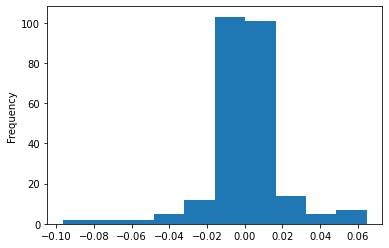

In [12]:
# Visualize distribution of Tesla percent change in closing price using a histogram plot
daily_returns_df.TSLA.plot.hist()

<AxesSubplot:ylabel='Frequency'>

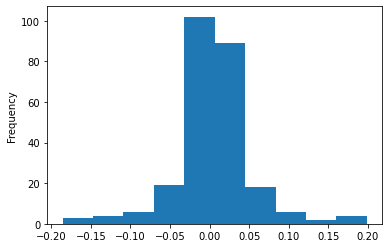

In [13]:
# Visualize distribution of Coca-Cola percent change in closing price using a histogram plot
daily_returns_df.KO.plot.hist()

<AxesSubplot:ylabel='Density'>

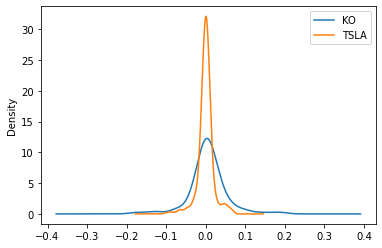

In [14]:
# Visualize the distribution of percent change in closing price for both stocks using a density plot
daily_returns_df.plot.density()